In [ ]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"","key":""}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/mushrooms-classification

# download the dataset from Kaggle and unzip it
!kaggle datasets download maysee/mushrooms-classification-common-genuss-images  -p ./datasets/mushrooms-classification
!unzip ./datasets/mushrooms-classification/*.zip  -d ./datasets/mushrooms-classification

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/mushrooms-classification/mushrooms/Mushrooms/Boletus/0622_axDS6XbWq14.jpg  
  inflating: ./datasets/mushrooms-classification/mushrooms/Mushrooms/Boletus/0623_rGwoTDghdAY.jpg  
  inflating: ./datasets/mushrooms-classification/mushrooms/Mushrooms/Boletus/0624_RmlDHXvJUeU.jpg  
  inflating: ./datasets/mushrooms-classification/mushrooms/Mushrooms/Boletus/0625_zqKe97TlLiA.jpg  
  inflating: ./datasets/mushrooms-classification/mushrooms/Mushrooms/Boletus/0626_Vr79bfyR04Q.jpg  
  inflating: ./datasets/mushrooms-classification/mushrooms/Mushrooms/Boletus/0627_eN6cXmAY_WM.jpg  
  inflating: ./datasets/mushrooms-classification/mushrooms/Mushrooms/Boletus/0628_HgADwtCnaLg.jpg  
  inflating: ./datasets/mushrooms-classification/mushrooms/Mushrooms/Boletus/0629_vlmH59caIwg.jpg  
  inflating: ./datasets/mushrooms-classification/mushrooms/Mushrooms/Boletus/0630_dhxHhToh_80.jpg  
  inflating: ./datasets/mushrooms-classification/

In [ ]:
from pathlib import Path
from fastai.vision.all import *

path = Path("./datasets/mushrooms-classification/mushrooms/")
files = get_image_files(path)
len(files)

6714

In [ ]:
files

(#6714) [Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Hygrocybe/039_Zn7phK2GDmU.jpg'),Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Hygrocybe/186_yM7ZkKb1Uqo.jpg'),Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Hygrocybe/001_p-EUoR7BDfY.jpg'),Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Hygrocybe/085_KKP3prTSeT0.jpg'),Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Hygrocybe/242_G4JkkkWpOAc.jpg'),Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Hygrocybe/217_OyhcdufzSCo.jpg'),Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Hygrocybe/249_FnzBNq5VsP4.jpg'),Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Hygrocybe/272_-uL1iUddkKE.jpg'),Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Hygrocybe/165_5xaRjIUy2Gk.jpg'),Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Hygrocybe/179_-d2avxABBac.jpg')...]

Some of the files are not valid let's remove them:

In [ ]:
import imghdr
[(i,imghdr.what(i)) for i in files if imghdr.what(i) !="jpeg" ][:10]

[(Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Lactarius/0554_R-ar5LbKaXA.jpg'),
  None),
 (Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Lactarius/286_8T67siL320M.jpg'),
  None),
 (Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Lactarius/0550_qjNlQ08T5BI.jpg'),
  None),
 (Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Lactarius/1171_GfnuwJs6myY.jpg'),
  None),
 (Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Lactarius/0548_m5tBPUxhgJE.jpg'),
  None),
 (Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Lactarius/0553_Ia808U9Udas.jpg'),
  None),
 (Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Lactarius/347_smbnWPF5Eqk.jpg'),
  None),
 (Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Amanita/773_3H-0yRwiu6Y.jpg'),
  None),
 (Path('datasets/mushrooms-classification/mushrooms/Mushrooms/Amanita/781_DBYcgumw0X4.jpg'),
  None),
 (Path('datasets/mushrooms-classification/mushrooms/Mushrooms/A

In [ ]:
s = set([i for i in files if imghdr.what(i) !="jpeg" ])
files = [i for i in files if i not in s]
len(files)

6694

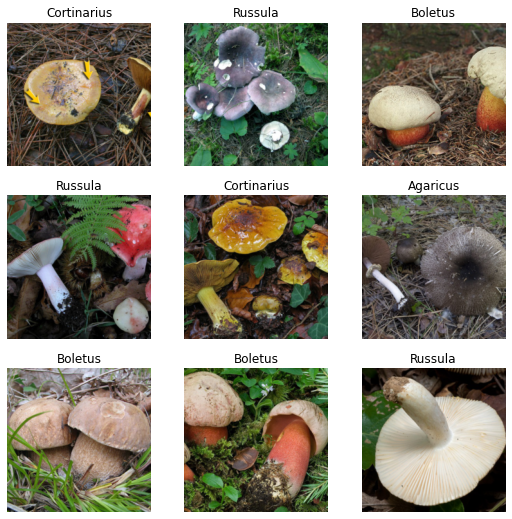

In [ ]:
import re


dls = ImageDataLoaders.from_folder(path, train="Mushrooms", valid_pct =0.2,seed=10, item_tfms=Resize(224))
dls.show_batch()

In [ ]:
?ImageDataLoaders.from_folder

## Take 1: Creating Our First Classifier

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0006918309954926372)

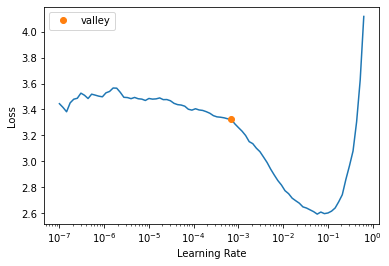

In [ ]:
# There was a problem with some of the images
# see https://forums.fast.ai/t/oserror-image-file-is-truncated-38-bytes-not-processed/30806/6
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
learn.lr_find()

In [ ]:
learn.fine_tune(10, 0.00069)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.225279,1.116614,0.362891,0.637109,01:20


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.350966,0.965637,0.304024,0.695976,01:20
1,1.072397,0.794535,0.260805,0.739195,01:21
2,0.774985,0.665308,0.221311,0.778689,01:20
3,0.516222,0.610942,0.195976,0.804024,01:20
4,0.335758,0.574367,0.179583,0.820417,01:21
5,0.231367,0.571400,0.169896,0.830104,01:20
6,0.146200,0.574693,0.165425,0.834575,01:20
7,0.103195,0.562036,0.162444,0.837556,01:21
8,0.079319,0.555759,0.157973,0.842027,01:20
9,0.077941,0.567499,0.166170,0.833830,01:20


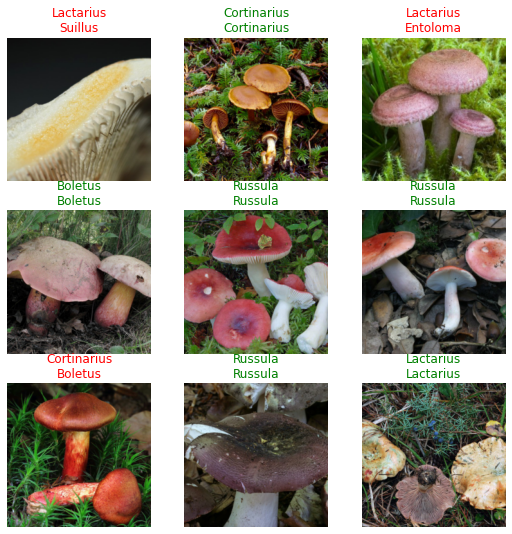

In [ ]:
learn.show_results()

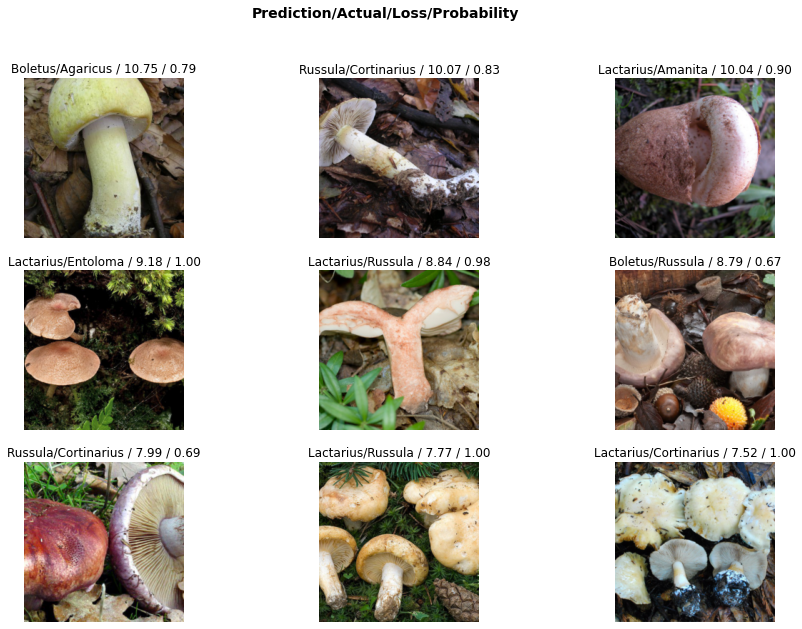

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

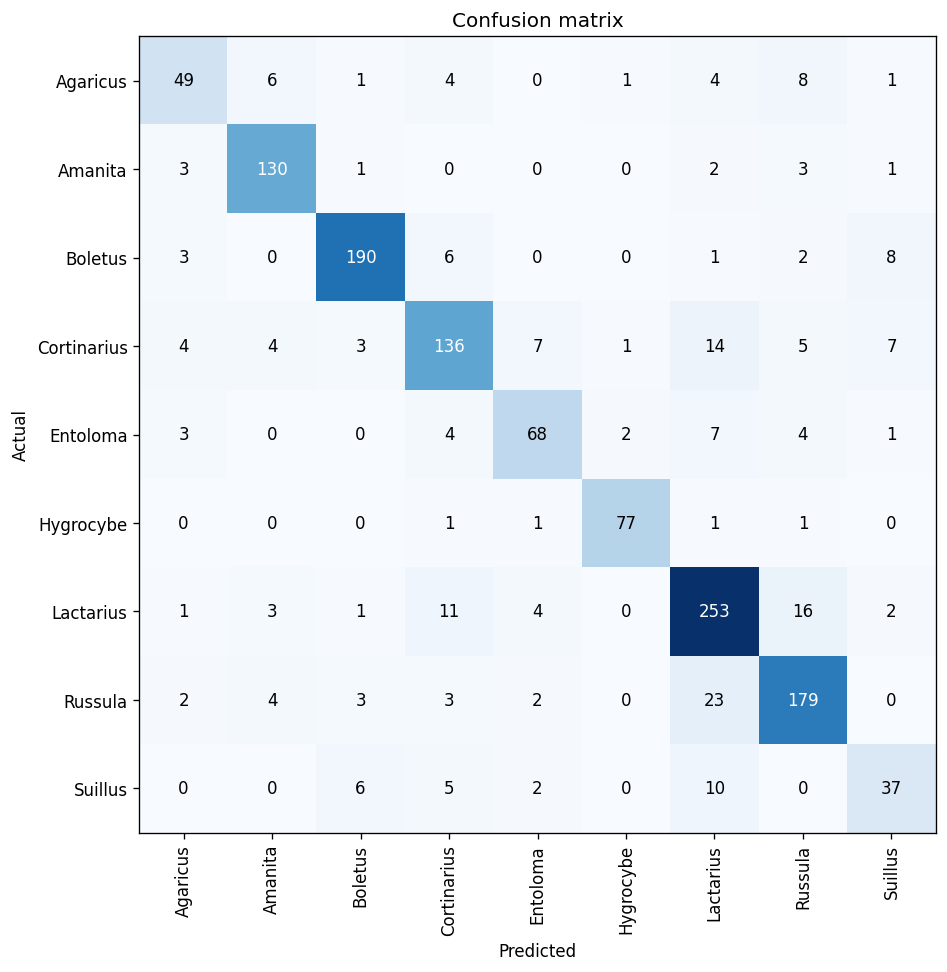

In [ ]:
cinterp = ClassificationInterpretation.from_learner(learn)
cinterp.plot_confusion_matrix(figsize=(8,8), dpi=120)

In [ ]:
m = cinterp.confusion_matrix()
m

array([[ 49,   6,   1,   4,   0,   1,   4,   8,   1],
       [  3, 130,   1,   0,   0,   0,   2,   3,   1],
       [  3,   0, 190,   6,   0,   0,   1,   2,   8],
       [  4,   4,   3, 136,   7,   1,  14,   5,   7],
       [  3,   0,   0,   4,  68,   2,   7,   4,   1],
       [  0,   0,   0,   1,   1,  77,   1,   1,   0],
       [  1,   3,   1,  11,   4,   0, 253,  16,   2],
       [  2,   4,   3,   3,   2,   0,  23, 179,   0],
       [  0,   0,   6,   5,   2,   0,  10,   0,  37]])

In [ ]:
cinterp.print_classification_report()


              precision    recall  f1-score   support

    Agaricus       0.75      0.66      0.71        74
     Amanita       0.88      0.93      0.91       140
     Boletus       0.93      0.90      0.92       210
 Cortinarius       0.80      0.75      0.77       181
    Entoloma       0.81      0.76      0.79        89
   Hygrocybe       0.95      0.95      0.95        81
   Lactarius       0.80      0.87      0.83       291
     Russula       0.82      0.83      0.82       216
     Suillus       0.65      0.62      0.63        60

    accuracy                           0.83      1342
   macro avg       0.82      0.81      0.81      1342
weighted avg       0.83      0.83      0.83      1342



## Take 2: Creating Our Second  Classifier - Using Image Augmentations

In [ ]:
dls = ImageDataLoaders.from_folder(path, train="Mushrooms", valid_pct =0.2, item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224), seed=10)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0012022644514217973)

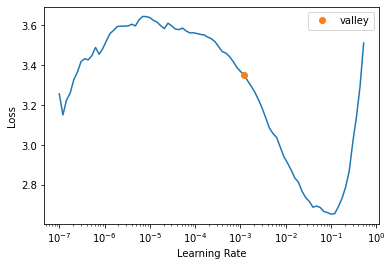

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(10, 0.0012)

epoch,train_loss,valid_loss,error_rate,time
0,2.056236,1.124656,0.350969,01:48


epoch,train_loss,valid_loss,error_rate,time
0,1.250157,0.886873,0.289121,01:40
1,0.980097,0.704419,0.224292,01:41
2,0.674614,0.573537,0.184054,01:38
3,0.493446,0.518421,0.159463,01:39
4,0.343070,0.451599,0.146796,01:38
5,0.253103,0.442988,0.129657,01:40
6,0.188082,0.437882,0.130402,01:39
7,0.143317,0.425769,0.116990,01:38
8,0.107268,0.417265,0.115499,01:39
9,0.100467,0.409492,0.122206,01:37


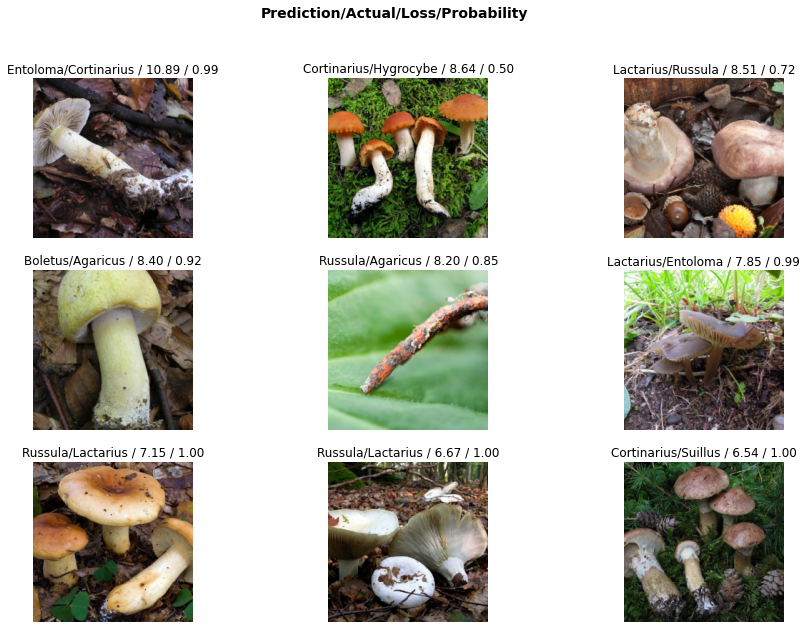

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

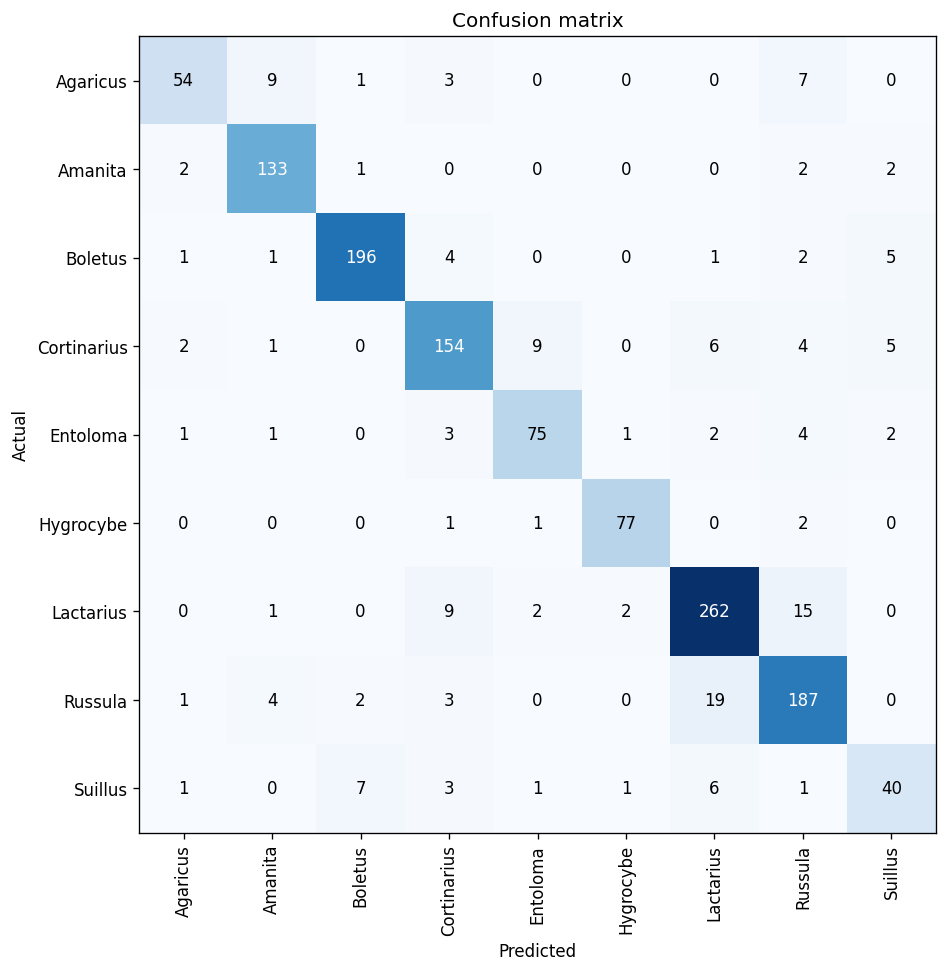

In [ ]:
cinterp = ClassificationInterpretation.from_learner(learn)
cinterp.plot_confusion_matrix(figsize=(8,8), dpi=120)

In [ ]:
cinterp.print_classification_report()

              precision    recall  f1-score   support

    Agaricus       0.87      0.73      0.79        74
     Amanita       0.89      0.95      0.92       140
     Boletus       0.95      0.93      0.94       210
 Cortinarius       0.86      0.85      0.85       181
    Entoloma       0.85      0.84      0.85        89
   Hygrocybe       0.95      0.95      0.95        81
   Lactarius       0.89      0.90      0.89       291
     Russula       0.83      0.87      0.85       216
     Suillus       0.74      0.67      0.70        60

    accuracy                           0.88      1342
   macro avg       0.87      0.85      0.86      1342
weighted avg       0.88      0.88      0.88      1342

